##### 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

I modified the mapper.py program that Alexis built during class so that it changes all cases to lower case and it separates the words from the punctuation in the text.  I also attempted to take the resulting strings containing multiple punctuation marks and separate each punctuation mark out individually for the sake of counting them with the reducer.py program.  I wasn't able to get it to work, unfortunately.  My plan was to create a list of words and punctuation marks in the document, assigning each a value of one.  Then I would use the command line to sort the list after applying the mapper program.  The last thing I had planned was to use the reducer.py program built in class to sum the number of occurrences for each word and each punctuation mark.  I ran into two issues, however.  My punctuation disappeared from the list for reasons I cannot understand, and some characters are not understood by the programs because they only appear in foreign languages.  I couldn't figure out how to address that problem, so I am turning in what I was able to complete.

Refer to my mapper.py file for further details.

##### 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

##### In a Jupyter notebook: 

##### 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a bar chart. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 

##### 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

##### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

### DataCamp

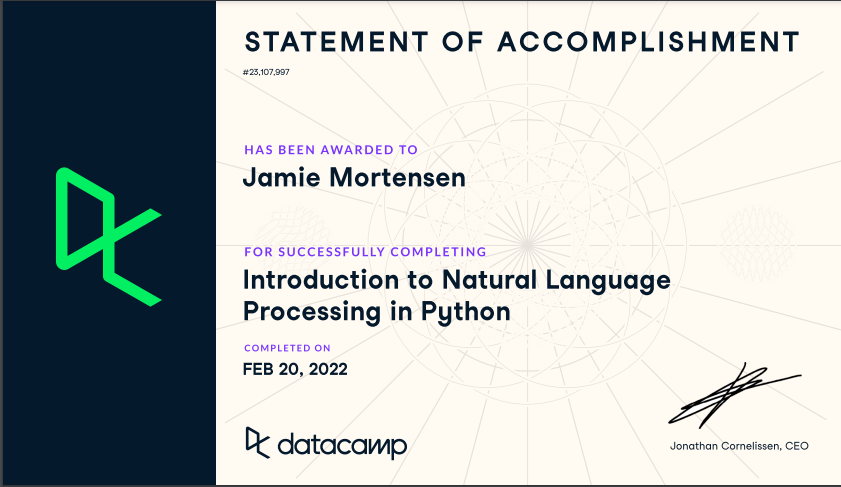